# Disease Symptoms and Patient Profile Dataset Test

This notebook tests the download and loading of the Disease Symptoms and Patient Profile dataset from Kaggle.

In [1]:
# Install required packages
%pip install kagglehub pandas matplotlib seaborn numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shutil

# Download the dataset to current directory
print("Downloading Disease Symptoms and Patient Profile dataset...")
cache_path = kagglehub.dataset_download("uom190346a/disease-symptoms-and-patient-profile-dataset")

# Copy to current folder
current_dir = os.getcwd()
local_data_dir = current_dir
os.makedirs(local_data_dir, exist_ok=True)

# Copy files from cache to local directory
for file in os.listdir(cache_path):
    src = os.path.join(cache_path, file)
    dst = os.path.join(local_data_dir, file)
    shutil.copy2(src, dst)
    print(f"Copied {file} to local data folder")

path = local_data_dir
print(f"Dataset available locally at: {path}")

/home/tamim/ai4ph/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Copied Disease_symptom_and_patient_profile_dataset.csv to local data folder
Dataset available locally at: /home/tamim/ai4ph/data/disease_symptoms_profiles


In [3]:
# List all files in the dataset
print("Files in dataset:")
files = os.listdir(path)
for file in files:
    file_path = os.path.join(path, file)
    if os.path.isfile(file_path):
        size = os.path.getsize(file_path) / 1024  # Size in KB
        print(f"- {file} ({size:.2f} KB)")

Files in dataset:
- Disease_symptom_and_patient_profile_dataset.csv (20.03 KB)
- README.md (1.06 KB)
- dataset_download.ipynb (120.22 KB)


In [4]:
# Load CSV files
csv_files = [f for f in files if f.endswith('.csv')]
print(f"Found {len(csv_files)} CSV files")

dataframes = {}
for csv_file in csv_files:
    print(f"\nLoading {csv_file}...")
    try:
        df = pd.read_csv(os.path.join(path, csv_file))
        dataframes[csv_file] = df
        print(f"✅ Loaded successfully: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        print(f"Sample data:\n{df.head(3)}\n")
    except Exception as e:
        print(f"❌ Error loading {csv_file}: {e}")

Found 1 CSV files

Loading Disease_symptom_and_patient_profile_dataset.csv...
✅ Loaded successfully: (349, 10)
Columns: ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']
Sample data:
       Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0    Influenza   Yes    No     Yes                  Yes   19  Female   
1  Common Cold    No   Yes     Yes                   No   25  Female   
2       Eczema    No   Yes     Yes                   No   25  Female   

  Blood Pressure Cholesterol Level Outcome Variable  
0            Low            Normal         Positive  
1         Normal            Normal         Negative  
2         Normal            Normal         Negative  



In [5]:
# Analyze each dataset
for filename, df in dataframes.items():
    print(f"\n{'='*50}")
    print(f"Analyzing {filename}")
    print(f"{'='*50}")
    
    print(f"Shape: {df.shape}")
    print(f"\nData types:")
    print(df.dtypes)
    
    # Check for missing values
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"\nMissing values:")
        print(missing[missing > 0])
    else:
        print("\n✅ No missing values")
    
    # Show unique values for categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols[:3]:  # Show first 3 categorical columns
        unique_count = df[col].nunique()
        print(f"\n{col}: {unique_count} unique values")
        if unique_count <= 10:
            print(f"Values: {list(df[col].unique())}")
        else:
            print(f"Sample values: {list(df[col].unique()[:10])}...")


Analyzing Disease_symptom_and_patient_profile_dataset.csv
Shape: (349, 10)

Data types:
Disease                 object
Fever                   object
Cough                   object
Fatigue                 object
Difficulty Breathing    object
Age                      int64
Gender                  object
Blood Pressure          object
Cholesterol Level       object
Outcome Variable        object
dtype: object

✅ No missing values

Disease: 116 unique values
Sample values: ['Influenza', 'Common Cold', 'Eczema', 'Asthma', 'Hyperthyroidism', 'Allergic Rhinitis', 'Anxiety Disorders', 'Diabetes', 'Gastroenteritis', 'Pancreatitis']...

Fever: 2 unique values
Values: ['Yes', 'No']

Cough: 2 unique values
Values: ['No', 'Yes']


Creating visualizations for Disease_symptom_and_patient_profile_dataset.csv


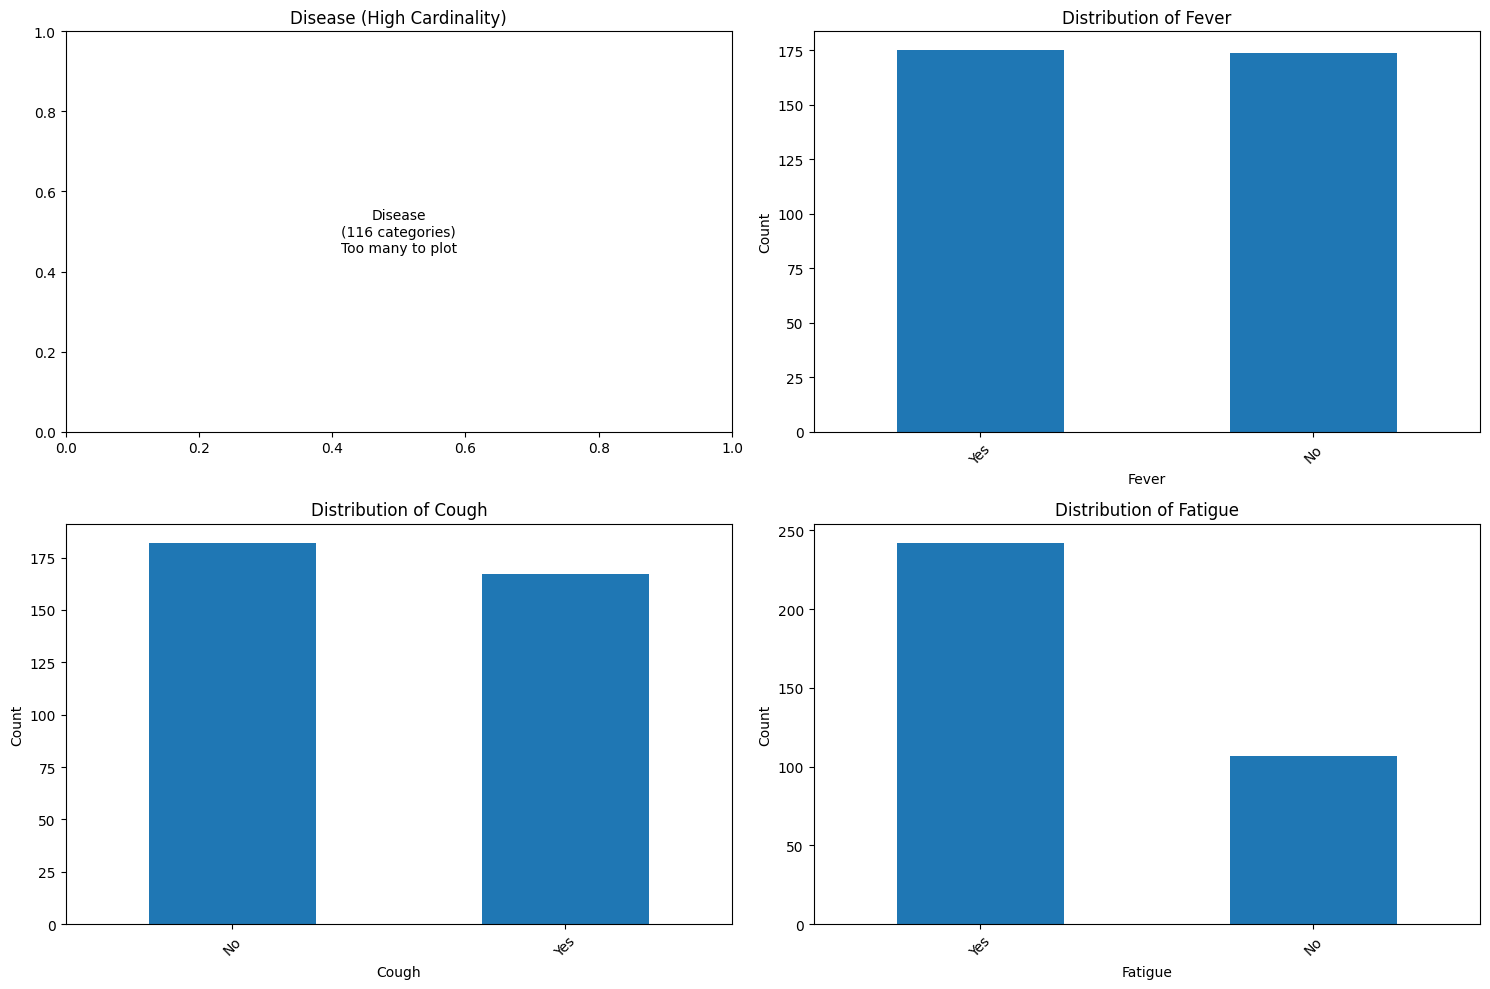

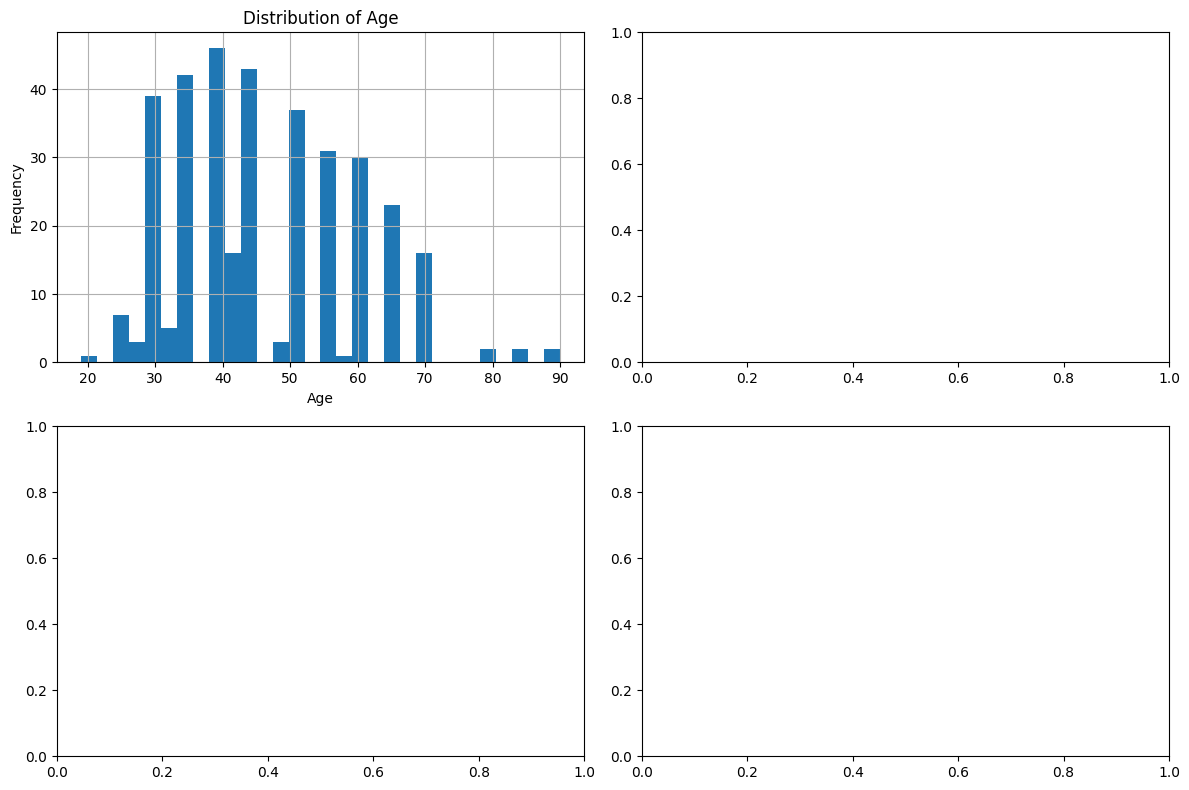

In [6]:
# Create visualizations for the main dataset
if dataframes:
    main_file = list(dataframes.keys())[0]
    df = dataframes[main_file]
    
    print(f"Creating visualizations for {main_file}")
    
    # Plot categorical distributions
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    if len(categorical_cols) > 0:
        n_plots = min(4, len(categorical_cols))
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.ravel()
        
        for i, col in enumerate(categorical_cols[:n_plots]):
            if df[col].nunique() <= 20:  # Only plot if reasonable number of categories
                value_counts = df[col].value_counts()
                value_counts.plot(kind='bar', ax=axes[i])
                axes[i].set_title(f'Distribution of {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Count')
                axes[i].tick_params(axis='x', rotation=45)
            else:
                axes[i].text(0.5, 0.5, f'{col}\n({df[col].nunique()} categories)\nToo many to plot', 
                           ha='center', va='center', transform=axes[i].transAxes)
                axes[i].set_title(f'{col} (High Cardinality)')
        
        plt.tight_layout()
        plt.show()
    
    # Plot numeric distributions if any
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(numeric_cols) > 0:
        n_plots = min(4, len(numeric_cols))
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        axes = axes.ravel()
        
        for i, col in enumerate(numeric_cols[:n_plots]):
            df[col].hist(ax=axes[i], bins=30)
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()

In [7]:
print("✅ Dataset download and analysis completed successfully!")
print("\nDataset Summary:")
print(f"- Location: {path}")
print(f"- Files: {len(files)}")
print(f"- CSV files: {len(csv_files)}")
if dataframes:
    total_rows = sum(df.shape[0] for df in dataframes.values())
    total_cols = sum(df.shape[1] for df in dataframes.values())
    print(f"- Total records: {total_rows:,}")
    print(f"- Total features: {total_cols}")
print("- Use case: Clinical decision support, disease prediction, symptom analysis")
print("- Perfect for: Machine learning, healthcare analytics, medical AI")

✅ Dataset download and analysis completed successfully!

Dataset Summary:
- Location: /home/tamim/ai4ph/data/disease_symptoms_profiles
- Files: 3
- CSV files: 1
- Total records: 349
- Total features: 10
- Use case: Clinical decision support, disease prediction, symptom analysis
- Perfect for: Machine learning, healthcare analytics, medical AI
